<a href="https://colab.research.google.com/github/Manusree1324/NLP-LAB/blob/main/nlp_29_8_25_1324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...     1.0  
1  Telangana: Section 144 has been imposed in Bha...     1.0  
2  Arsonist sets cars ablaze at dealership https:...     1.0  
3  Arsonist sets cars ablaze at dealership https:...     1.0  
4  "Lord Jesus, your love brings freedom and pard...     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7350 non-null   int64  
 1   keyword   7350 non-null   object 
 2   location  5168 non-null   object 
 3   text      7349 non-null   object 
 4   target    7349 non-null   float64
dtypes: float64(1), int64(1), object(3)
memo

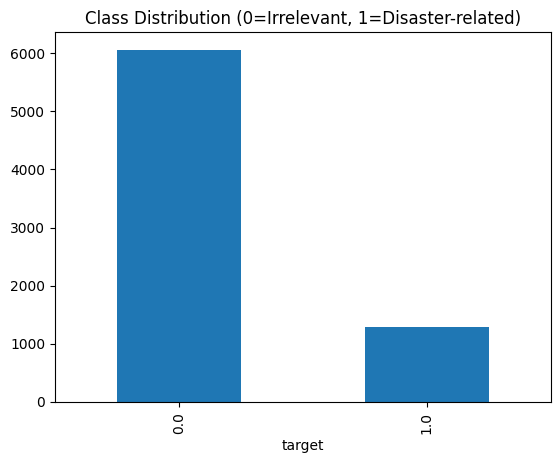


Sample Disaster Tweets:
["Philippines' Taal volcano eruption spews lava and coats Manila with ash https://t.co/acHx0Lo7oE https://t.co/W7JFF385hT", 'The bush fires destruction of nature and wildlife in Australia has hit home hard with many of us we thought it only ap…', 'Incident 04. | 13/01 12:47 allout, The team called at 12:47 hrs by the SWAST to assist with the evacuation of an ad… https://t.co/SQNNMEkL0z']

Sample Irrelevant Tweets:
['Jessica Yaniv just attacked outside the courthouse. His response: “Get away from me you f**king crazy f**ki…', 'If an HGV, wrongly using this bridge causes it to collapse any diversion will be for a great deal longer than…', '“my heart hurts nowadays. please don’t get hurt and hope nature doesn’t bring more harm please please ..” -🐯#PrayforThePhilippin…']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tweets.csv")
print(df.head())
print(df.info())

df["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution (0=Irrelevant, 1=Disaster-related)")
plt.show()

print("\nSample Disaster Tweets:")
print(df[df["target"]==1]["text"].sample(3, random_state=42).tolist())

print("\nSample Irrelevant Tweets:")
print(df[df["target"]==0]["text"].sample(3, random_state=42).tolist())


In [3]:
import re, string
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab") # Added this line to download the missing resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

STOPWORDS = set(stopwords.words("english"))
URL_RE = re.compile(r"http\S+|www\.\S+")
MENTION_RE = re.compile(r"@\w+")
HASHTAG_RE = re.compile(r"#(\w+)")
EMOJI_RE = re.compile("["
                      u"\U0001F600-\U0001F64F"
                      u"\U0001F300-\U0001F5FF"
                      u"\U0001F680-\U0001F6FF"
                      u"\U0001F1E0-\U0001F1FF"
                      "]+", flags=re.UNICODE)

def reduce_elongation(word, max_repeat=2):
    return re.sub(r"(.)\1{%d,}" % max_repeat, r"\1"*max_repeat, word)

def preprocess_text(text):
    text = URL_RE.sub(" ", str(text))
    text = MENTION_RE.sub(" ", text)
    text = HASHTAG_RE.sub(r"\1", text)
    text = EMOJI_RE.sub(" ", text)
    text = text.lower()
    tokens = word_tokenize(text)
    clean = []
    for w in tokens:
        w = w.translate(str.maketrans("", "", string.punctuation))
        if not w or w in STOPWORDS:
            continue
        w = reduce_elongation(w)
        clean.append(w)
    return clean

df["tokens"] = df["text"].apply(preprocess_text)
df["clean_text"] = df["tokens"].apply(lambda x: " ".join(x))
print(df[["text","clean_text"]].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                          clean_text  
0  communal violence bhainsa telangana stones pel...  
1  telangana section 144 imposed bhainsa january ...  
2               arsonist sets cars ablaze dealership  
3               arsonist sets cars ablaze dealership  
4  lord jesus love brings freedom pardon fill hol...  


In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")

ps = PorterStemmer()
wnl = WordNetLemmatizer()

sample = df.sample(5, random_state=1)
for _, row in sample.iterrows():
    original = row["text"]
    stemmed = " ".join(ps.stem(w) for w in row["tokens"])
    lemmatized = " ".join(wnl.lemmatize(w) for w in row["tokens"])
    print("\nOriginal :", original)
    print("Stemmed  :", stemmed)
    print("Lemma    :", lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...



Original : Remember the kid in pursuit of happiness movie when he made a joke abt the guy who was drowning in the oce…
Stemmed  : rememb kid pursuit happi movi made joke abt guy drown oce…
Lemma    : remember kid pursuit happiness movie made joke abt guy drowning oce…

Original : But we can take it further: this exact outcome has been attempted before, by an ally of the US against an ally of Iran. Prec…
Stemmed  : take exact outcom attempt alli us alli iran prec…
Lemma    : take exact outcome attempted ally u ally iran prec…

Original : lifewtr hits like eyewitness (1994-1997) on PBS or, like, on the TV in your elementary school classroom https://t.co/4XiDVrzDbq
Stemmed  : lifewtr hit like eyewit 19941997 pb like tv elementari school classroom
Lemma    : lifewtr hit like eyewitness 19941997 pb like tv elementary school classroom

Original : If you are experiencing an eye emergency call Abbey Eye Care right away - the most common eye emergencies include c… https://t.co/IfmzhsEBLZ
Stemm

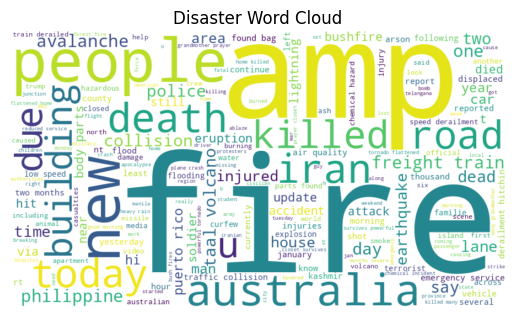

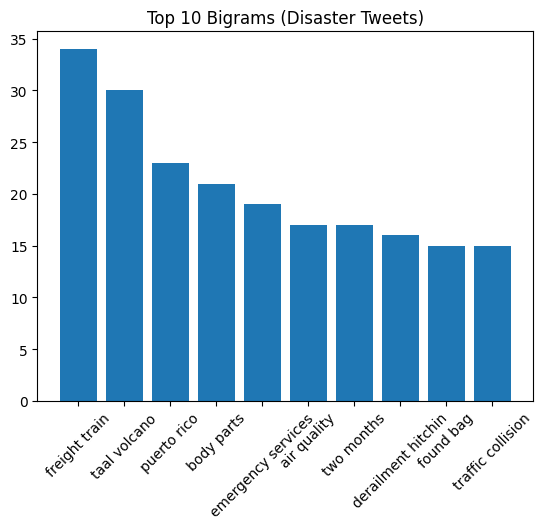

In [5]:
from wordcloud import WordCloud
from collections import Counter
from itertools import tee

# Word Cloud
disaster_tokens = [w for toks in df[df["target"]==1]["tokens"] for w in toks]
wc = WordCloud(width=900, height=500, background_color="white").generate(" ".join(disaster_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Disaster Word Cloud")
plt.show()

# Top 10 bigrams
def bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    return zip(a, b)

bigram_counter = Counter()
for toks in df[df["target"]==1]["tokens"]:
    bigram_counter.update([" ".join(bg) for bg in bigrams(toks)])

labels, vals = zip(*bigram_counter.most_common(10))
plt.bar(range(len(labels)), vals)
plt.xticks(range(len(labels)), labels, rotation=45)
plt.title("Top 10 Bigrams (Disaster Tweets)")
plt.show()

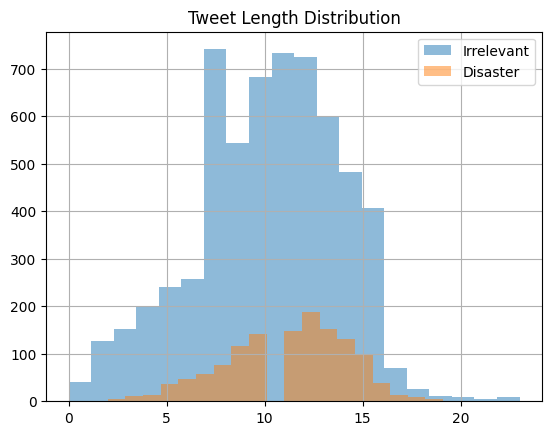

Avg length Irrelevant: 10.153249752556912
Avg length Disaster  : 11.128982128982129


In [6]:
df["len_tokens"] = df["tokens"].apply(len)

df[df["target"]==0]["len_tokens"].hist(alpha=0.5, bins=20, label="Irrelevant")
df[df["target"]==1]["len_tokens"].hist(alpha=0.5, bins=20, label="Disaster")
plt.legend()
plt.title("Tweet Length Distribution")
plt.show()

print("Avg length Irrelevant:", df[df["target"]==0]["len_tokens"].mean())
print("Avg length Disaster  :", df[df["target"]==1]["len_tokens"].mean())


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Drop rows with NaN in the 'target' column
df.dropna(subset=['target'], inplace=True)

X = df["clean_text"]
y = df["target"]

vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (5879, 7000)
Test size : (1470, 7000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": MultinomialNB()
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained.")


LogisticRegression trained.
NaiveBayes trained.



LogisticRegression Results
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1213
         1.0       0.96      0.29      0.45       257

    accuracy                           0.87      1470
   macro avg       0.92      0.64      0.69      1470
weighted avg       0.89      0.87      0.84      1470



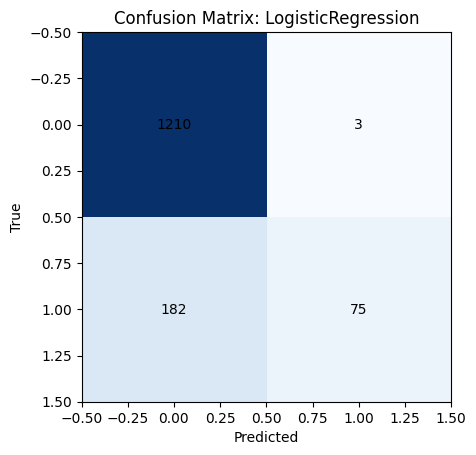


NaiveBayes Results
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1213
         1.0       0.97      0.39      0.56       257

    accuracy                           0.89      1470
   macro avg       0.93      0.70      0.75      1470
weighted avg       0.90      0.89      0.87      1470



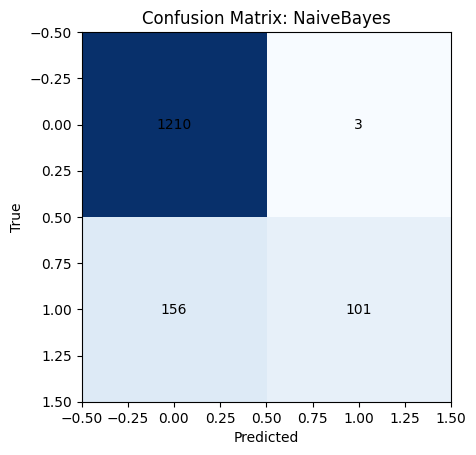

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for (i,j), v in np.ndenumerate(cm):
        plt.text(j,i,str(v),ha="center",va="center")
    plt.show()
